<a href="https://colab.research.google.com/github/JPedro2/ImageClassificationWorkshop/blob/master/model_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from __future__ import absolute_import, division, print_function

import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.1


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
train_images = train_images / 255.0

test_images = test_images / 255.0

train_images.shape

(60000, 28, 28)

# Add depth dimension

In [4]:
train_images = train_images.reshape(train_images.shape[0], train_images.shape[1], train_images.shape[2], 1)
train_labels = train_labels.reshape(train_labels.shape[0], 1)

test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)
test_labels = test_labels.reshape(test_labels.shape[0], 1)

train_images.shape

(60000, 28, 28, 1)

# Add Convolutional Layer and MaxPooling Layer

In [5]:
model = keras.Sequential([
        keras.layers.Conv2D(filters = 32, kernel_size = (5,5),activation ='relu', padding='same', 
                            input_shape = (28,28,1)),
        keras.layers.MaxPooling2D(pool_size=(2,2)),       

        keras.layers.Flatten(),
        keras.layers.Dense(512, activation = "relu"),
        keras.layers.Dense(10, activation = "softmax")])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
from time import time

tensorboard = tf.keras.callbacks.TensorBoard(log_dir="logs/{}".format(time()))

model.fit(train_images, train_labels, epochs=20, validation_split=0.2, callbacks=[tensorboard])

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 11s 231us/sample - loss: 0.3811 - acc: 0.8633 - val_loss: 0.3171 - val_acc: 0.8866
Epoch 2/20
48000/48000 [==============================] - 7s 156us/sample - loss: 0.2559 - acc: 0.9058 - val_loss: 0.2891 - val_acc: 0.8953
Epoch 3/20
48000/48000 [==============================] - 7s 155us/sample - loss: 0.2038 - acc: 0.9234 - val_loss: 0.2458 - val_acc: 0.9130
Epoch 4/20
48000/48000 [==============================] - 7s 155us/sample - loss: 0.1656 - acc: 0.9374 - val_loss: 0.2509 - val_acc: 0.9151
Epoch 5/20
48000/48000 [==============================] - 7s 156us/sample - loss: 0.1319 - acc: 0.9510 - val_loss: 0.2854 - val_acc: 0.9058
Epoch 6/20
48000/48000 [==============================] - 7s 156us/sample - loss: 0.1067 - acc: 0.9605 - val_loss: 0.2741 - val_acc: 0.9141
Epoch 7/20
48000/48000 [==============================] - 7s 155us/sample - loss: 0.0853 - acc: 0.9690 - val_

In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

10000/10000 [==============================] - 1s 55us/sample - loss: 0.6351 - acc: 0.9065
Test accuracy: 0.9065


In [0]:
predictions = model.predict(test_images)

In [0]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)
  
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

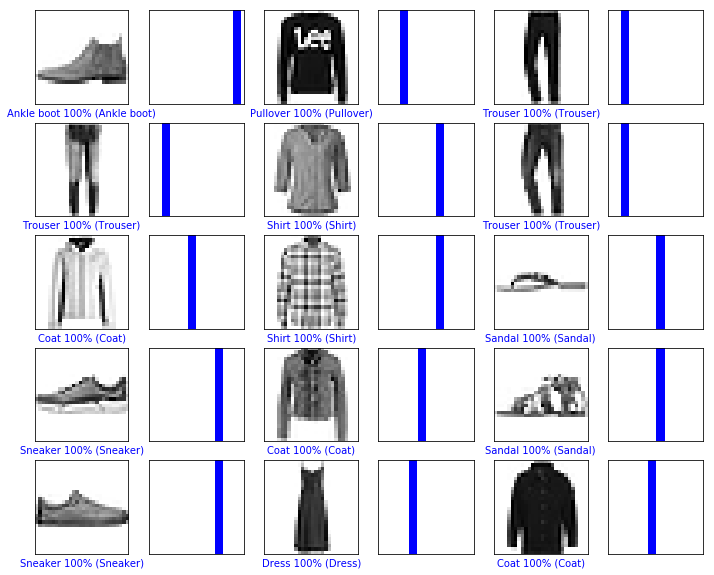

In [11]:
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
# Reshape test_data (remove last column) to allow to plot the Prediction Graph
test_images = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2])
test_labels = test_labels.reshape(test_labels.shape[0])
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()

# Next Steps

Adding the convolutional layers does seem to improve our model and it seems to achieve a slightly higher accuracy. However, it is clear that the `validation loss` is a bit too high, which indicates that our model seems to be overfitting as it is learning too much from the trainning data and not able to _generalise_ so well with new data. Perhaps the model is being trained for too long, so let's look at a few techniques to avoid overfitting. 

[Prev](https://github.com/JPedro2/ImageClassificationWorkshop/blob/master/model_1.ipynb) - [Next](https://github.com/JPedro2/ImageClassificationWorkshop/blob/master/model_3.ipynb)